In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df =pd.read_csv('/content/Social_Network_Ads.csv')


In [16]:
df.head

<bound method NDFrame.head of      Gender  Age  EstimatedSalary  Purchased
0         0   19            19000          0
1         0   35            20000          0
2         1   26            43000          0
3         1   27            57000          0
4         0   19            76000          0
..      ...  ...              ...        ...
395       1   46            41000          1
396       0   51            23000          1
397       1   50            20000          1
398       0   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]>

In [5]:
df =df.drop(['User ID'],axis=1)

In [6]:
df['Gender'] =df['Gender'].map({'Male':0,'Female':1})

In [7]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [11]:
X = df.drop(columns=['Purchased'])
y= df['Purchased']

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 3) (320,)
Test set: (80, 3) (80,)


**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler() 
SS.fit(X_train)
X_train= SS.transform(X_train)
SS.fit(X_test)
X_test= SS.transform(X_test)
X.shape

(400, 3)

**Fitting Decision Tree Classification to the Training set**

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)



DecisionTreeClassifier(random_state=0)

**Predicting the Test set results**

In [35]:
# Predict test set labels
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


Test set accuracy: 0.82
Test set auc: 0.88
Train set AUC :  0.9959016393442623


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


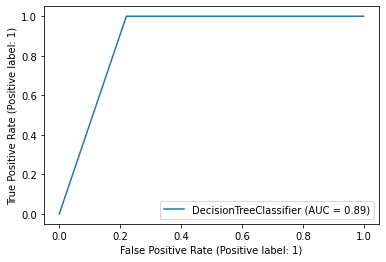

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primari
# Compute test set accuracy
acc = accuracy_score(y_test, y_test_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_test_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)

**Making the Confusion Matrix**

Train score 0.996875
Test score 0.825
Train Confusion matrix


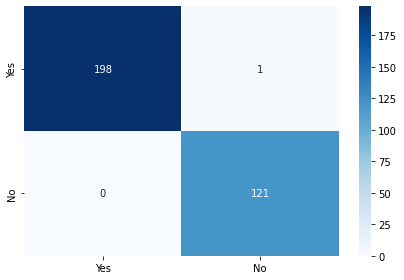

Test Confusion matrix


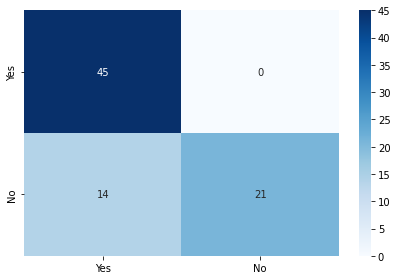

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

**Visualising the Training set results**

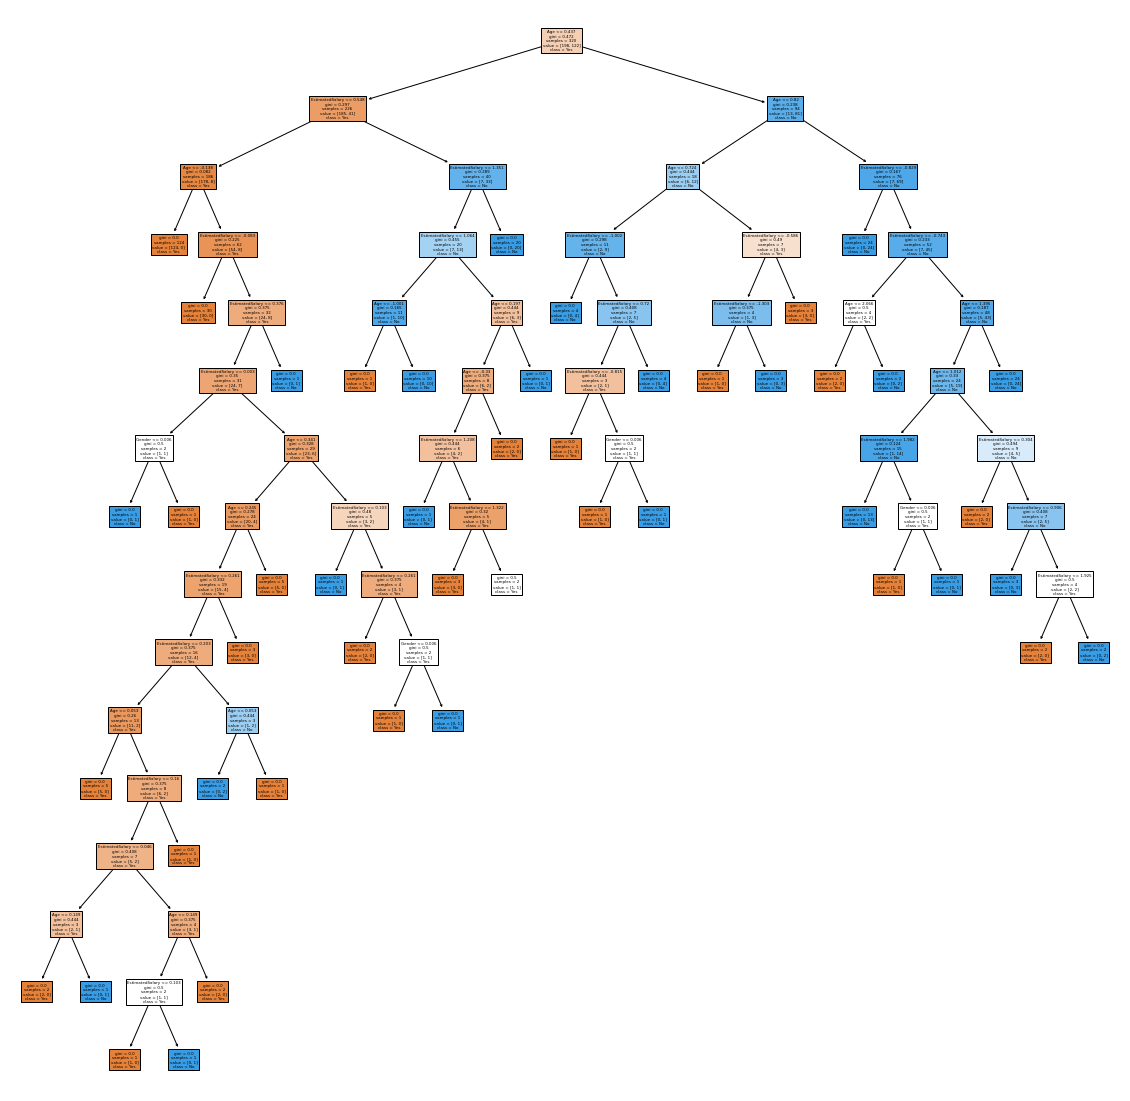

In [30]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Yes','No']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

**Visualising the Test set results**

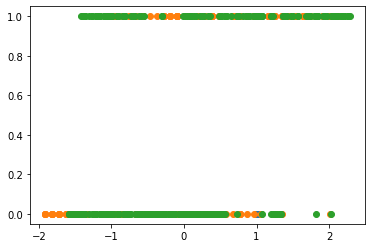

In [32]:
plt.plot(X_train,y_train_pred,"o")